In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,8)

In [2]:
data = pd.read_csv("/home/deepak/Documents/week2.csv")
data = data.fillna(0)

In [3]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.set_index('Date',inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2019-10-24 to 2017-10-25
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close Price            503 non-null    float64
 1   Open Price             503 non-null    float64
 2   High Price             503 non-null    float64
 3   Low Price              503 non-null    float64
 4   Total Traded Quantity  503 non-null    float64
 5   Month                  503 non-null    int64  
 6   Year                   503 non-null    int64  
 7   Day_perc_Change        503 non-null    float64
 8   Trend                  503 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 39.3+ KB


In [4]:
data.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Day_perc_Change,Trend
Date,,,,,,,,,
2019-10-24,1780.78,1770.78,1787.97,1760.78,5.20,10,2019,0.000000,Slight or No change
2019-10-23,1762.17,1761.30,1770.05,1742.00,2.19,10,2019,-1.045048,Negative
2019-10-22,1765.73,1788.15,1789.78,1762.00,2.23,10,2019,0.202024,Slight or No change
2019-10-21,1785.66,1769.66,1785.88,1765.00,2.22,10,2019,1.128712,Positive
2019-10-18,1757.51,1787.80,1793.98,1749.20,3.37,10,2019,-1.576448,Negative


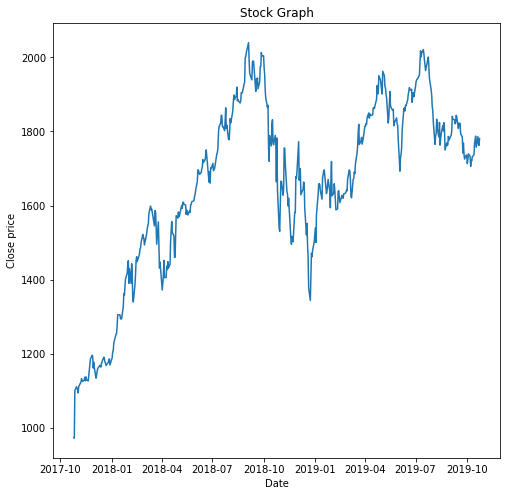

In [5]:
plt.plot(data['Close Price'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Stock Graph')
plt.show()

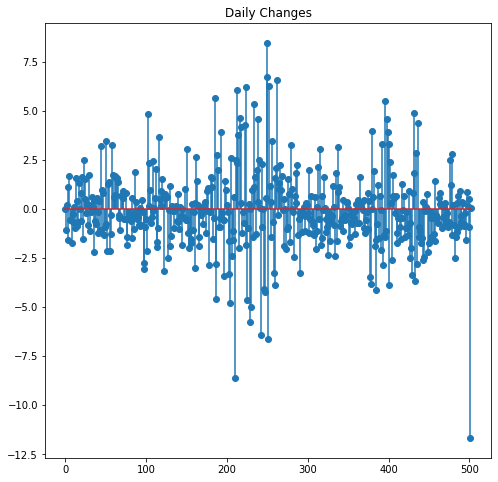

In [6]:
plt.stem(data['Day_perc_Change'], use_line_collection = True)
plt.title('Daily Changes')
plt.show()

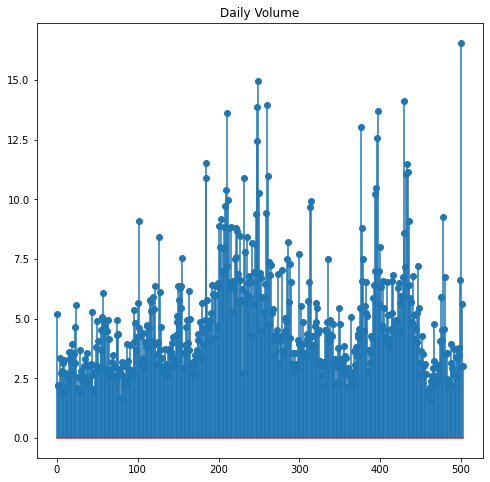

In [7]:
plt.stem(data['Total Traded Quantity'], use_line_collection = True)
plt.title('Daily Volume')
plt.show()

In [8]:
# 2.4 Pie Chart

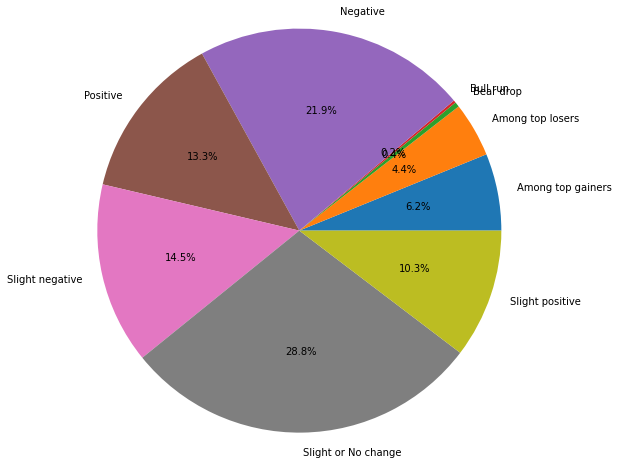

In [9]:

T = data.groupby('Trend').count()
label = ['Among top gainers', 'Among top losers', 'Bear drop', 'Bull run',
       'Negative', 'Positive', 'Slight negative', 'Slight or No change',
       'Slight positive']
freq = [ 31,  22,   2,   1, 110,  67,  73, 145,  52]
plt.pie(freq, labels = label, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [13]:
# T = data.groupby('Trend').mean()
# T['Total Traded Quantity'].values
TTQ1 = [ 6.44516129,  7.19      ,  6.42      , 10.29      ,  4.89172727,
        5.06074627,  4.36808219,  4.18896552,  4.62019231]
# plt.bar(label, TTQ1)
# plt.title('Averege')
# plt.show()

In [14]:
# T = data.groupby('Trend').median()
# T['Total Traded Quantity'].values
TTQ2 = [ 6.02 ,  6.515,  6.42 , 10.29 ,  4.385,  4.52 ,  3.81 ,  3.68 ,
        4.265]
# plt.bar(label, TTQ2)
# plt.title('Median')
# plt.show()

Text(0.5, 1.0, 'Median')

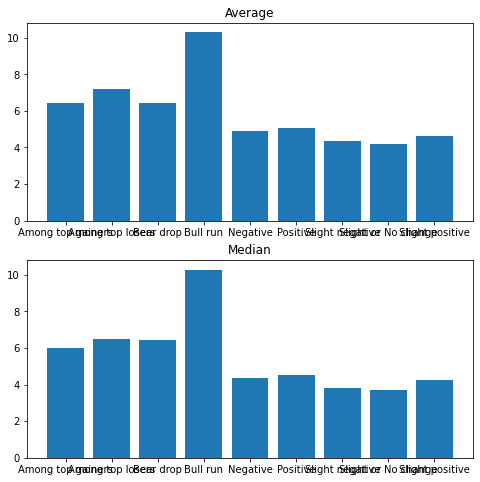

In [15]:
fig, axs = plt.subplots(2)
axs[0].bar(label, TTQ1)
axs[0].set_title('Average')
axs[1].bar(label, TTQ2)
axs[1].set_title('Median')

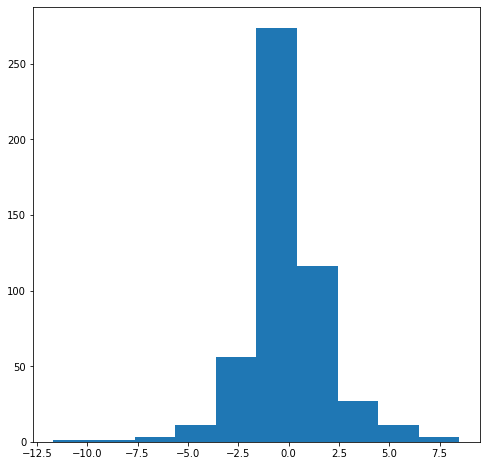

In [16]:
x = data['Day_perc_Change'].values
plt.hist(x)
plt.show()

In [17]:
df1 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/ASHOKA.csv')
df2 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/BAJAJELEC.csv')
df3 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/BOMDYEING.csv')
df4 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/CENTURYPLY.csv')
df5 = pd.read_csv('/home/deepak/Documents/ML-Intern/Small_Cap/FORTIS.csv')

In [66]:
 df = { df1['Symbol'][0]: df1['Close Price'], df2['Symbol'][0]: df2['Close Price'],
       df3['Symbol'][0]: df3['Close Price'], df4['Symbol'][0]: df4['Close Price'], 
       df5['Symbol'][0]: df5['Close Price']}
df = pd.DataFrame(df).dropna()
df

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS
0,216.05,341.15,82.20,266.65,205.25
1,214.90,347.00,83.40,266.10,207.90
2,217.00,349.85,82.25,264.85,205.90
3,209.65,334.10,78.95,260.35,196.85
4,206.25,336.20,77.15,254.05,203.55
...,...,...,...,...,...
489,118.10,557.75,121.45,163.15,136.35
490,115.45,534.45,119.35,161.30,135.20
491,115.30,531.85,117.75,160.50,133.60
492,117.45,540.90,117.05,160.50,133.00


In [67]:
per_change = df.pct_change().dropna()
per_change

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS
1,-0.005323,0.017148,0.014599,-0.002063,0.012911
2,0.009772,0.008213,-0.013789,-0.004697,-0.009620
3,-0.033871,-0.045019,-0.040122,-0.016991,-0.043953
4,-0.016218,0.006286,-0.022799,-0.024198,0.034036
5,-0.022545,-0.068263,-0.040830,0.005708,-0.042987
...,...,...,...,...,...
489,0.017665,-0.000179,-0.065050,-0.034330,-0.010163
490,-0.022439,-0.041775,-0.017291,-0.011339,-0.008434
491,-0.001299,-0.004865,-0.013406,-0.004960,-0.011834
492,0.018647,0.017016,-0.005945,0.000000,-0.004491


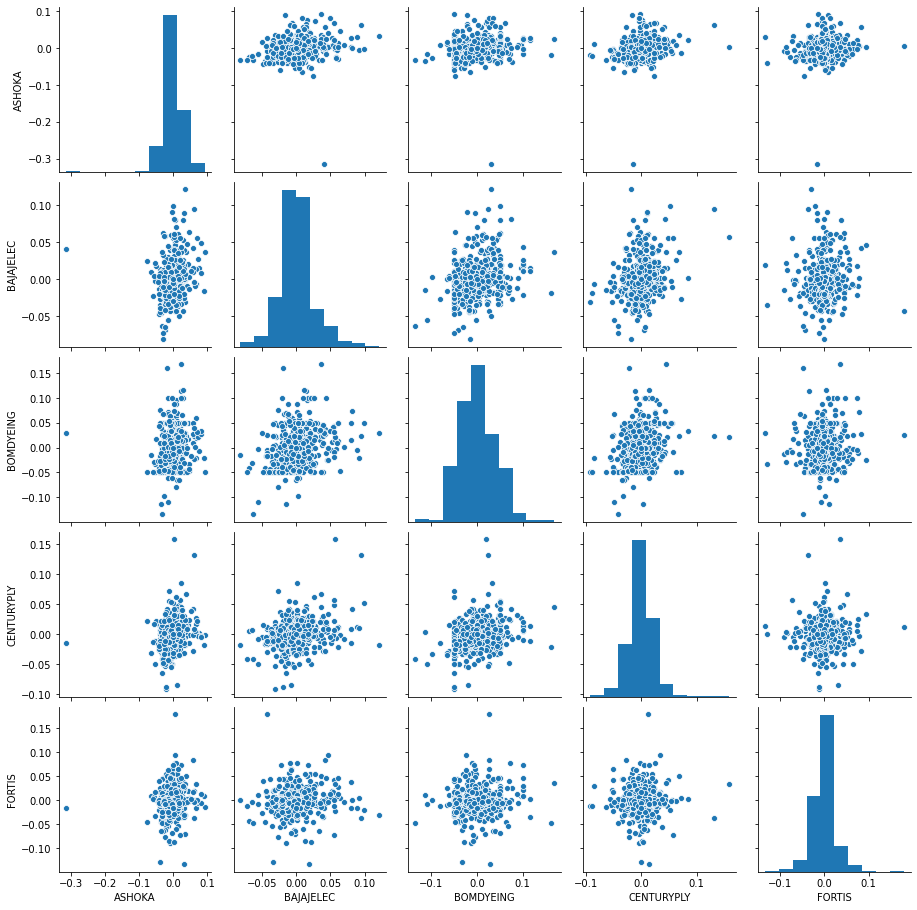

In [39]:
sns.pairplot(per_change)
plt.show()

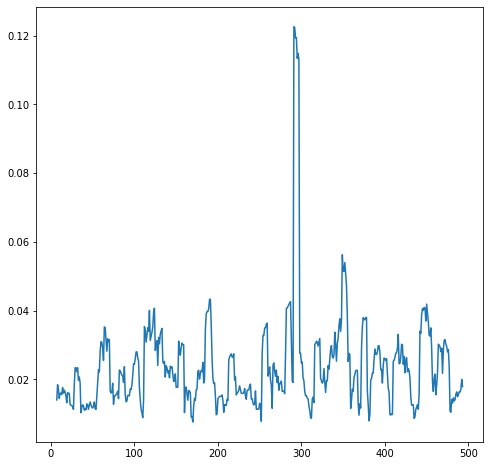

In [96]:
# 2.7 
# Volality
# 7 days rolling average of any stock
roll = per_change['ASHOKA'].rolling(7).std()
plt.plot(roll)
plt.show()

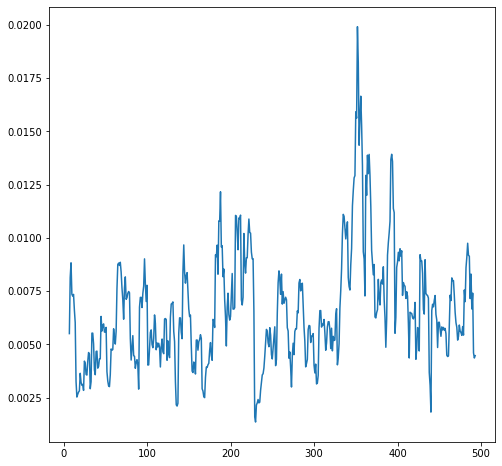

In [97]:
## Nifty Index
nifty = pd.read_csv('/home/deepak/Documents/ML-Intern/Nifty50/Nifty50.csv')
nifty_per_change = nifty['Close'].pct_change().dropna()
volatility = nifty_per_change.rolling(7).std()
plt.plot(volatility)
plt.show()

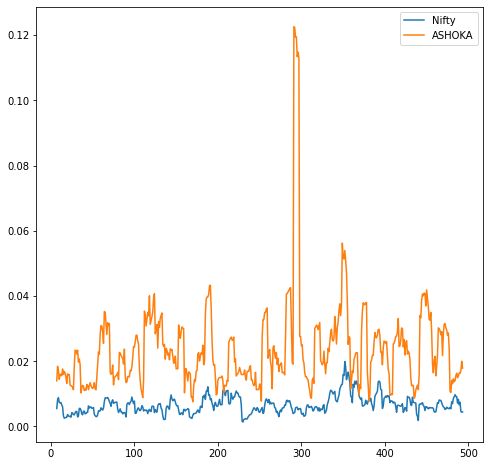

In [118]:
# Compare two
# x = plt.subplot(111)
plt.plot(volatility, label = 'Nifty')
plt.plot(roll, label = 'ASHOKA')
plt.legend(loc="upper right")
plt.show()

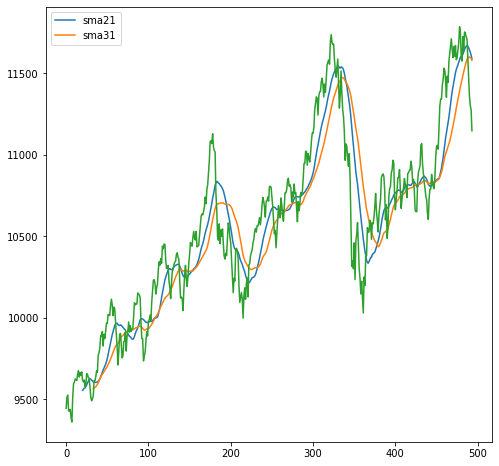

In [135]:
# SMA (Simple Moving Average)
# a1+a2+...+an/n where no. of total period and an is close price at period n
sma21 = nifty['Close'].rolling(21).mean()
sma31 =  nifty['Close'].rolling(34).mean()
average = nifty['Close'].rolling(1).mean()
plt.plot(sma21, label = 'sma21')
plt.plot(sma31, label = 'sma31')
plt.plot(average)
plt.legend(loc="upper left")
plt.show()

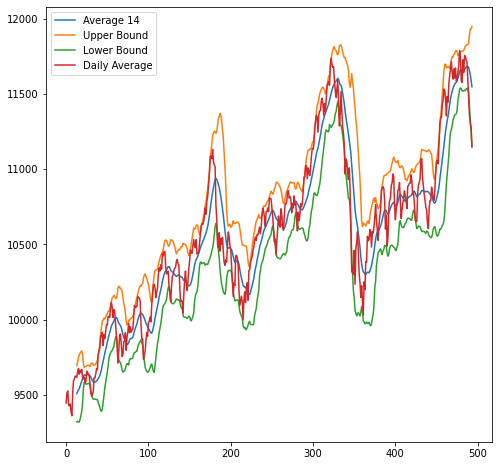

In [137]:
# Bollinger Band
avg14 = nifty['Close'].rolling(14).mean()
upper_bond = avg14 + nifty['Close'].rolling(14).std()*2
lower_bond = avg14 - nifty['Close'].rolling(14).std()*2
daily_avg = nifty['Close'].rolling(1).mean()
plt.plot(avg14, label = "Average 14")
plt.plot(upper_bond, label = "Upper Bound")
plt.plot(lower_bond, label = "Lower Bound")
plt.plot(daily_avg, label = "Daily Average")
plt.legend(loc = "upper left")
plt.show()

In [138]:
a = pd.DataFrame([5,6,7,8,9,10,11,12,13])
b = a.rolling(5).mean()
b.values

array([[nan],
       [nan],
       [nan],
       [nan],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.]])